In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
from mplsoccer import Pitch, VerticalPitch
import math
import time
import seaborn as sns

In [180]:
from utils_feature_engineering import get_all_events_of_a_match, percent_coord_to_points, get_shot_distance, get_shot_angle, plot_in_pitch
%run utils_feature_engineering

In [181]:
#df = pd.read_csv('events_Spain.csv.zip')
#df = pd.read_csv('events_England.csv.zip')
#df = pd.read_csv('events_Italy.csv.zip')
df = pd.read_csv('events_Germany.csv.zip')
#df = pd.read_csv('events_France.csv.zip')

In [235]:
df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tagsList,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x,minut,x_position,y_position
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85.0,179896442,[1801],50,50,48,50,0.040162,50,50
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85.0,179896443,[1801],48,50,22,22,0.041768,50,48
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85.0,179896444,[1801],22,22,46,6,0.115778,22,22
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85.0,179896445,[1801],46,6,10,20,0.179775,6,46
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85.0,179896446,[1801],10,20,4,27,0.211409,20,10


In [182]:
df.columns

Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id',
       'tagsList', 'pos_orig_y', 'pos_orig_x', 'pos_dest_y', 'pos_dest_x'],
      dtype='object')

In [183]:
df_all_matches = pd.read_csv('matches_Germany.csv.zip')

In [184]:
df_all_matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,...,team2.side,team2.teamId,team2.score,team2.scoreP,team2.hasFormation,team2.formation,team2.scoreHT,team2.formation.bench,team2.formation.lineup,team2.formation.substitutions
0,Played,4405517,34,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",181137,2018-05-12 13:30:00,2445,Allianz Arena,2517036,"Bayern M\u00fcnchen - Stuttgart, 1 - 4",...,away,2445,4,0,1,"{'bench': [{'playerId': 356908, 'ownGoals': '0...",2,"[{'playerId': 356908, 'ownGoals': '0', 'redCar...","[{'playerId': 14845, 'ownGoals': '0', 'redCard...","[{'playerIn': 99410, 'playerOut': 14845, 'minu..."
1,Played,4405517,34,"{'2482': {'scoreET': 0, 'coachId': 272299, 'si...",181137,2018-05-12 13:30:00,2482,WIRSOL Rhein-Neckar-Arena,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1",...,away,2447,1,0,1,"{'bench': [{'playerId': 14770, 'ownGoals': '0'...",0,"[{'playerId': 14770, 'ownGoals': '0', 'redCard...","[{'playerId': 14789, 'ownGoals': '2', 'redCard...","[{'playerIn': 14816, 'playerOut': 14789, 'minu..."
2,Played,4405517,34,"{'2457': {'scoreET': 0, 'coachId': 18987, 'sid...",181137,2018-05-12 13:30:00,2975,Olympiastadion Berlin,2517038,"Hertha BSC - RB Leipzig, 2 - 6",...,away,2975,6,0,1,"{'bench': [{'playerId': 15069, 'ownGoals': '0'...",3,"[{'playerId': 15069, 'ownGoals': '0', 'redCard...","[{'playerId': 406682, 'ownGoals': '0', 'redCar...","[{'playerIn': 70975, 'playerOut': 406682, 'min..."
3,Played,4405517,34,"{'2453': {'scoreET': 0, 'coachId': 14977, 'sid...",181137,2018-05-12 13:30:00,2453,Schwarzwald-Stadion,2517039,"Freiburg - Augsburg, 2 - 0",...,away,2481,0,0,1,"{'bench': [{'playerId': 14767, 'ownGoals': '0'...",0,"[{'playerId': 14767, 'ownGoals': '0', 'redCard...","[{'playerId': 16826, 'ownGoals': '0', 'redCard...","[{'playerIn': 354997, 'playerOut': 16826, 'min..."
4,Played,4405517,34,"{'2449': {'scoreET': 0, 'coachId': 447924, 'si...",181137,2018-05-12 13:30:00,2449,VELTINS-Arena,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0",...,away,2462,0,0,1,"{'bench': [{'playerId': 49856, 'ownGoals': '0'...",0,"[{'playerId': 49856, 'ownGoals': '0', 'redCard...","[{'playerId': 136011, 'ownGoals': '0', 'redCar...","[{'playerIn': 3535, 'playerOut': 136011, 'minu..."


In [185]:
df_all_matches.columns

Index(['status', 'roundId', 'gameweek', 'teamsData', 'seasonId', 'dateutc',
       'winner', 'venue', 'wyId', 'label', 'date', 'referees', 'duration',
       'competitionId', 'team1.scoreET', 'team1.coachId', 'team1.side',
       'team1.teamId', 'team1.score', 'team1.scoreP', 'team1.hasFormation',
       'team1.formation', 'team1.scoreHT', 'team1.formation.bench',
       'team1.formation.lineup', 'team1.formation.substitutions',
       'team2.scoreET', 'team2.coachId', 'team2.side', 'team2.teamId',
       'team2.score', 'team2.scoreP', 'team2.hasFormation', 'team2.formation',
       'team2.scoreHT', 'team2.formation.bench', 'team2.formation.lineup',
       'team2.formation.substitutions'],
      dtype='object')

# TAGS

In [186]:
tags_df = pd.read_csv('tags2name.csv') 

In [187]:
tags_df.head()

,Tag,Label,Description
0,101,Goal,Goal
1,102,own_goal,Own goal
2,301,assist,Assist
3,302,keyPass,Key pass
4,1901,counter_attack,Counter attack


Get the event minute (from 0 to 90)

In [188]:
df['minut'] = df['eventSec']/60
df.loc[(df['matchPeriod'] == '2H'), 'minut'] = df['minut']+45

Get the coordinates (in % of field size)

In [189]:
df['x_position'] = df['positions'].apply(lambda x: ast.literal_eval(x)[0]['x'])
df['y_position'] = df['positions'].apply(lambda x: ast.literal_eval(x)[0]['y'])

# SHOTS

In [190]:
shots_df = df[df['eventName'] == 'Shot'].reset_index()

In [191]:
len(shots_df)

6896

Match tags with tags dataframe

In [192]:
def match_tags(tags_list, tags_df):
    tags_names = []
    for tag in ast.literal_eval(tags_list):
        tags_names.append(tags_df[tags_df['Tag'] == tag]['Description'].values[0])
    return tags_names

In [193]:
shots_df['TagNames'] = shots_df.apply(lambda x: match_tags(x['tagsList'], tags_df), axis=1)

Get all the possible set of tags to remove those ones filtering future information

In [194]:
possible_shot_tags = []

for tag_list in shots_df['TagNames']:
    for tag in tag_list:
        if tag not in possible_shot_tags:
            possible_shot_tags.append(tag)

In [195]:
tag_to_remove = ['Blocked', 'Not accurate', 'Interception', 'Opportunity']

Dummify tags and remove tags with future information

In [196]:
tags_dummified = pd.get_dummies(shots_df['TagNames'].explode()).groupby(level=0).sum()
tags_dummified = tags_dummified.drop(tag_to_remove, axis=1)

Add tags encoded as columns in shots dataframe

In [197]:
shots_df = shots_df.join(tags_dummified)

Remove list coordinates columns

In [198]:
shots_df = shots_df.drop(['pos_orig_y','pos_orig_x','pos_dest_y','pos_dest_x'], axis=1, errors='ignore')

Plot some shots in the pitch

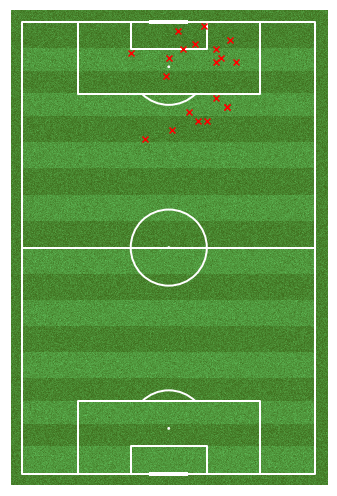

In [199]:
plot_in_pitch(shots_df.x_position.head(20),shots_df.y_position.head(20))

PITCH COORDINATES AND DISTANCES:

https://dataglossary.wyscout.com/pitch_coordinates/

GET SHOT DISTANCE

In [200]:
GOAL_POSITION_POINT = (105,32.5)
PITCH_DIMENSIONS = (105,65)

In [201]:
percent_coord_to_points(90,70)

(94.5, 45.5)

In [202]:
shots_df['distance'] = shots_df.apply(lambda x: get_shot_distance(x['x_position'], x['y_position']), axis=1)

GET SHOT ANGLE

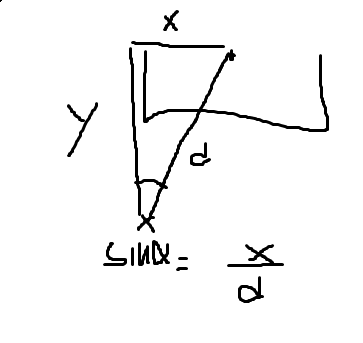

In [203]:
shots_df['angle'] = shots_df.apply(lambda x: get_shot_angle(x['x_position'], x['y_position']), axis=1)

VARIABLES RELACIONADES AMB LA DURADA/POSICIÓ DE LA POSSESSIÓ (TRANSICIÓ RAPIDA, ROBO CAMP CONTRARI...

In [204]:
def get_previous_events_before_shot(shot):
    match_events = get_all_events_of_a_match(shot['matchId'],df) 
    previous_events = match_events[match_events['minut']<shot['minut']]
    
    possesion_duration = float(0.0)
    recovery_coordinate = [50,50]
    recovery_way = 'No recovery'
    assist_type = 'No assist'
    
    if len(previous_events) != 0:
        last_rival_event = previous_events[previous_events['teamId']!=shot['teamId']].tail(1)
        assist_type = previous_events[previous_events['teamId']==shot['teamId']].tail(1)
        if len(assist_type) != 0:
            assist_type = assist_type['subEventName'].values[0]
        if len(last_rival_event)!=0:
            possesion_duration = shot['minut'] - last_rival_event['minut']
            possesion_duration = possesion_duration.values[0]
            recovery_coordinate = [last_rival_event['x_position'].values[0], last_rival_event['y_position'].values[0]]
            recovery_way = last_rival_event['subEventName'].values[0]
        
  
    return possesion_duration, recovery_coordinate, recovery_way, assist_type

Extraiem variables de la funcio anterior

In [205]:
%%time
possession_durations = []
recovery_coordinates = []
recovery_ways = []
assists_types = []
for i, shot in shots_df.iterrows():
    possession_duration, recovery_coordinate, recovery_way, assist_type = get_previous_events_before_shot(shot)
    
    possession_durations.append(possession_duration)
    recovery_coordinates.append(recovery_coordinate)
    recovery_ways.append(recovery_way)
    assists_types.append(assist_type)

Wall time: 32.7 s


Observem on es recupera mes la pilota (camp propi)

In [206]:
x_recovers = []
y_recovers = []

for coords in recovery_coordinates:
    x_recovers.append(coords[0])
    y_recovers.append(coords[1])

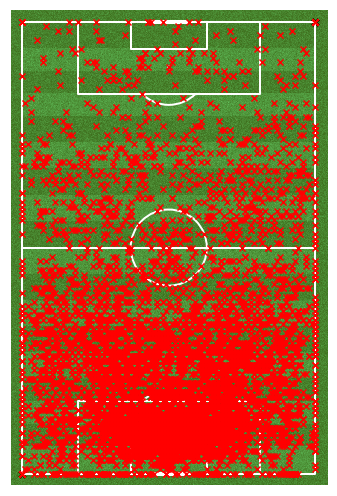

In [207]:
plot_in_pitch(x_recovers, y_recovers)

In [208]:
len(shots_df)

6896

In [209]:
len(assists_types)

6896

Add variables to df

In [210]:
shots_df['x_coordinate_recovery'] = x_recovers
shots_df['y_coordinate_recovery'] = y_recovers
shots_df['possesion_time'] = possession_durations
shots_df['recovery_way'] = recovery_ways
shots_df['assist_type'] = assists_types

EXPORT TO CSV

In [211]:
#shots_df.to_csv('shots_spain.csv')
#shots_df.to_csv('shots_england.csv')
#shots_df.to_csv('shots_italy.csv')
#shots_df.to_csv('shots_france.csv')
shots_df.to_csv('shots_germany.csv')

# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------

Agafem els xuts de totes les lligues

In [253]:
dfs = pd.read_csv('shots_spain.csv')
dfe = pd.read_csv('shots_england.csv')
dfi = pd.read_csv('shots_italy.csv')
dfg = pd.read_csv('shots_france.csv')
dffr = pd.read_csv('shots_germany.csv')

In [254]:
final_df = pd.concat([dfs,dfe,dfi,dfg,dffr])

Afegim una variable per determinar si el xut ha estat amb la cama bona del jugador o no

In [255]:
df_ply = pd.read_csv('players.csv')

In [256]:
def get_player_foot(shot):
    player_id = shot['playerId']
    player_foot = df_ply[df_ply['wyId']==player_id]['foot']
    return player_foot

In [257]:
def check_shot_natural_foot(shot):
    player_foot = get_player_foot(shot)
    
    if len(player_foot)==0:
        return 1
        
    else:
        player_foot = get_player_foot(shot).values[0]
        shot_foot = str

        if shot['Left foot'] == 1:
            shot_foot = 'left'

        elif shot['Right foot'] == 1:
            shot_foot = 'right'

        elif shot['Head/body'] == 1:
            shot_foot = 'No foot'
    
        
    if player_foot == shot_foot:
        return 1
    
    return 0

In [258]:
final_df['with_natural_foot'] = final_df.apply(lambda x: check_shot_natural_foot(x), axis=1)

Determinem si la recuperacio de la jugada del xut ha sigut a mes de tres quarts de camp o no.

In [259]:
final_df['three_quarters_field_recuperation'] = np.where(np.array(final_df['x_coordinate_recovery'])>=75, 1, 0)

In [260]:
final_df['three_quarters_field_recuperation'].value_counts()

0    38319
1     2136
Name: three_quarters_field_recuperation, dtype: int64

Extraiem variables rellevants de tipus d'assistencia

In [244]:
final_df['simple_pass'] = np.where(np.array(final_df['assist_type']) == 'Simple pass', 1, 0)
final_df['ground_atacking_duel'] = np.where(np.array(final_df['assist_type']) == 'Ground attacking duel', 1, 0)
final_df['cross'] = np.where(np.array(final_df['assist_type']) == 'Cross', 1, 0)
final_df['air_duel'] = np.where(np.array(final_df['assist_type']) == 'Air duel', 1, 0)
final_df['smart_pass'] = np.where(np.array(final_df['assist_type']) == 'Smart pass', 1, 0)
final_df['corner_pass'] = np.where(np.array(final_df['assist_type']) == 'Corner', 1, 0)
final_df['high_pass'] = np.where(np.array(final_df['assist_type']) == 'High pass', 1, 0)
final_df['head_pass'] = np.where(np.array(final_df['assist_type']) == 'Head pass', 1, 0)

SELECCIO DE COLUMNES PER AL MODEL

In [245]:
final_df.columns

Index(['Unnamed: 0', 'index', 'eventId', 'subEventName', 'tags', 'playerId',
       'positions', 'matchId', 'eventName', 'teamId', 'matchPeriod',
       'eventSec', 'subEventId', 'id', 'tagsList', 'minut', 'x_position',
       'y_position', 'TagNames', 'Accurate', 'Assist', 'Counter attack',
       'Goal', 'Head/body', 'Key pass', 'Left foot', 'Position: Goal center',
       'Position: Goal center left', 'Position: Goal center right',
       'Position: Goal high center', 'Position: Goal high left',
       'Position: Goal high right', 'Position: Goal low center',
       'Position: Goal low left', 'Position: Goal low right',
       'Position: Out center left', 'Position: Out center right',
       'Position: Out high center', 'Position: Out high left',
       'Position: Out high right', 'Position: Out low left',
       'Position: Out low right', 'Position: Post center left',
       'Position: Post center right', 'Position: Post high center',
       'Position: Post high left', 'Position: P

In [1]:
columns_for_model = [
                    'minut', 'x_position', 'y_position', 'Counter attack', 'Goal' ,'Head/body',
                    'distance',  'angle', 'x_coordinate_recovery', 'y_coordinate_recovery',
                    'possesion_time', 'with_natural_foot', 'Right foot', 'Left foot',
                    'three_quarters_field_recuperation', 'simple_pass',
                    'ground_atacking_duel', 'cross', 'air_duel', 'smart_pass',
                    'corner_pass', 'high_pass', 'head_pass'
                    ]

EXPORTEM EL DATAFRAME FINAL PER TREBALLAR AMB EL MODEL

In [251]:
all_final_shots_for_model.to_csv('shots_df_all_leagues_for_model.csv')

In [252]:
final_df['Goal'].value_counts()

0    36186
1     4269
Name: Goal, dtype: int64